In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import json
from nilearn import plotting

import rtcloud

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
conf = {
    'test': 1
}

client = rtcloud.Client(server_ip='rtcloud.brainiak.org', conf=conf)
client.start()

In [ ]:
client.queue(input_dir='data', tr=2000, loop=True)
client.watch(callback=lambda result: print(result))

/Users/dsuo/rtcloud/venv/lib/python3.6/site-packages/nilearn/datasets/data/avg152T1_brain.nii.gz


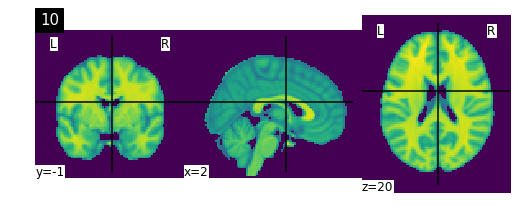

In [25]:
from nilearn.datasets import MNI152_FILE_PATH
print(MNI152_FILE_PATH)

rtcloud.display_input(MNI152_FILE_PATH, 10)